In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Frame Extraction Cell ---

video_path = 'DynamicHard24.mp4'
frame_indices = [n * 43 for n in range(12)]

extracted_frames = []

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video file {video_path}")
else:
    for index in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, index)
        ret, frame = cap.read()
        if ret:
            extracted_frames.append(frame)
        else:
            print(f"Warning: Could not read frame at index {index}")
    cap.release()

print(f"Extracted {len(extracted_frames)} frames.")

# Global variables to store intermediate results for subsequent cells
processed_edges = []
processed_dilated_inverted = []
processed_contours = []

# Define colors (from your original code)
red = (86, 45, 143)
white = (212, 213, 211)
green = (64, 90, 58)
blue = (56, 22, 1)

Extracted 12 frames.


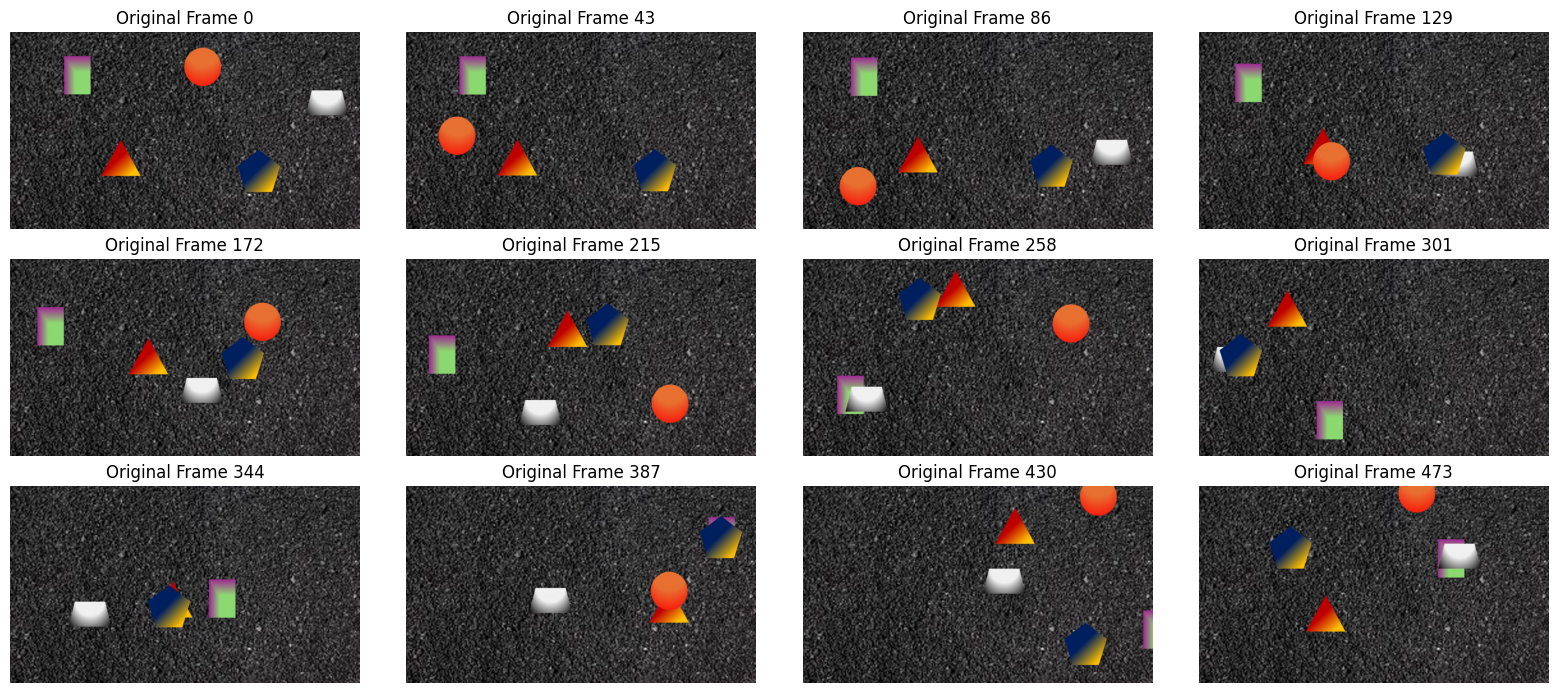

In [4]:
fig, axes = plt.subplots(3, 4, figsize=(16, 7))
axes = axes.flatten()

if len(extracted_frames) == 0:
    print("No frames were extracted to display.")
else:
    for i, frame_bgr in enumerate(extracted_frames):
        if i < len(axes):
            rgb_frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
            axes[i].imshow(rgb_frame)
            axes[i].set_title(f"Original Frame {frame_indices[i]}")
            axes[i].axis('off')

    for j in range(len(extracted_frames), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

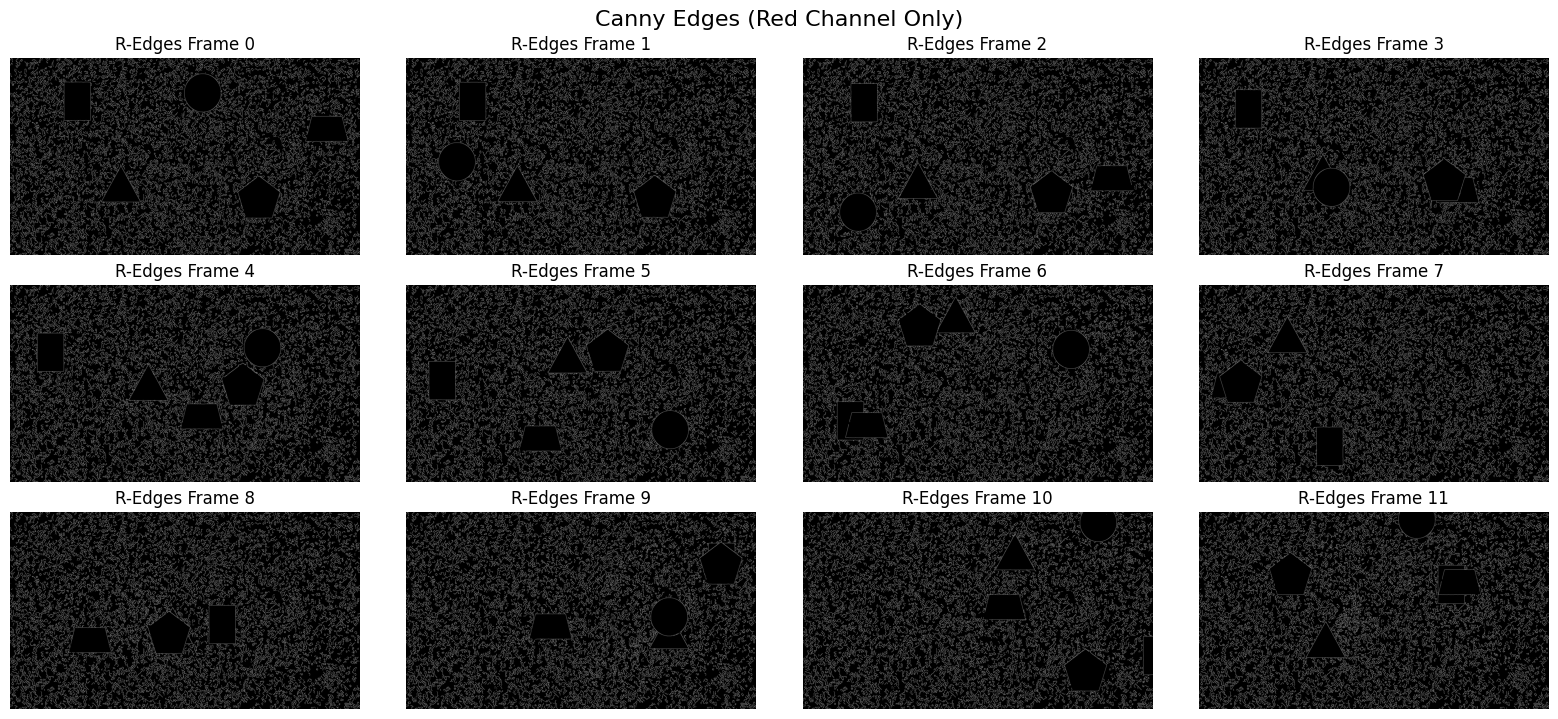

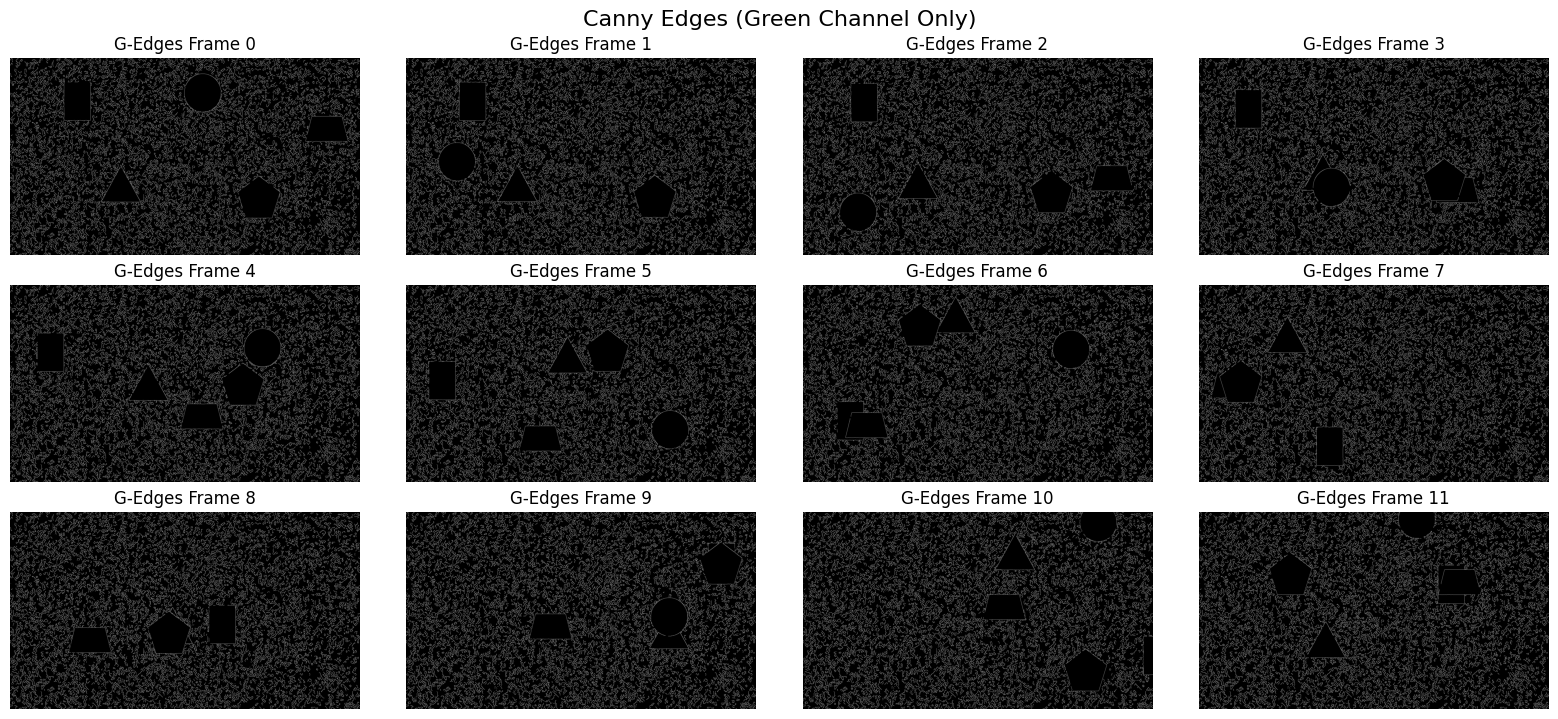

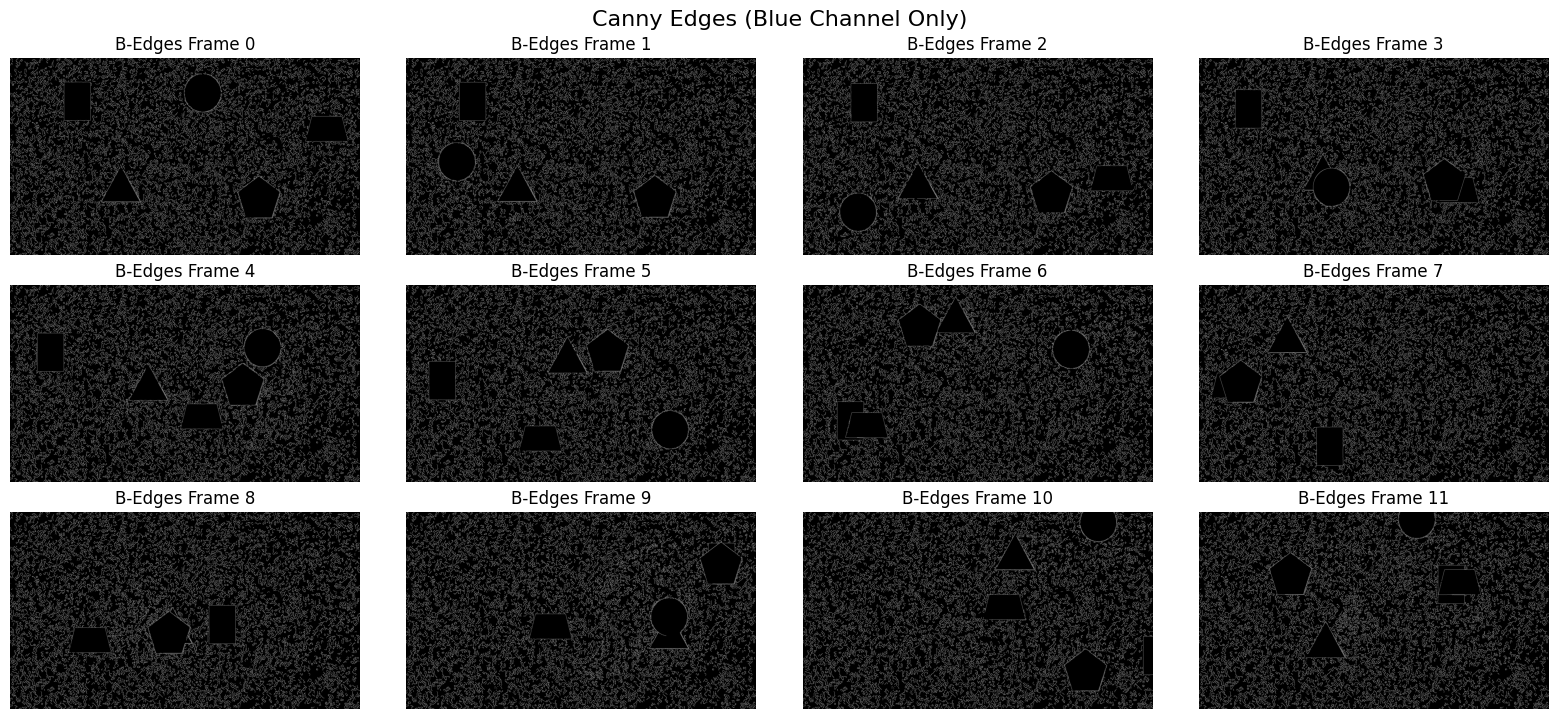

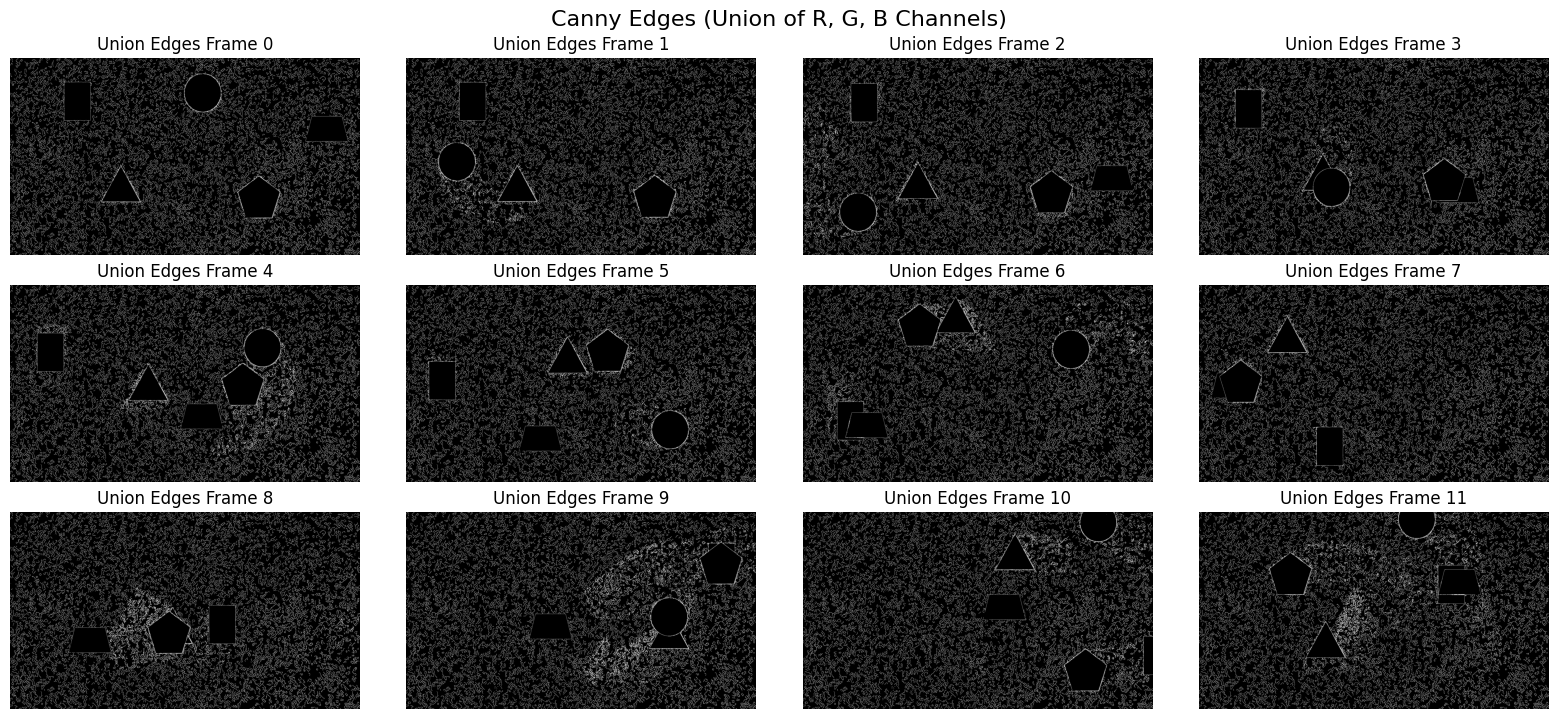

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

frame_indices = list(range(len(extracted_frames)))

# Prepare lists to hold Canny results for each channel and the union
canny_r_results = []
canny_g_results = []
canny_b_results = []
canny_union_results = []

startingThresh = 50
endingThresh = 100
apSize = 3

for frame_bgr in extracted_frames:
    # Split channels
    b_channel, g_channel, r_channel = cv2.split(frame_bgr)

    # Apply Canny to each channel
    edges_r = cv2.Canny(r_channel, startingThresh, endingThresh, apertureSize=apSize)
    edges_g = cv2.Canny(g_channel, startingThresh, endingThresh, apertureSize=apSize)
    edges_b = cv2.Canny(b_channel, startingThresh, endingThresh, apertureSize=apSize)

    edges_b, edges_g, edges_r = cv2.bilateralFilter(edges_b, 9, 50, 50), cv2.bilateralFilter(edges_g, 9, 50, 50), cv2.bilateralFilter(edges_r, 9, 50, 50)

    # Union the results
    union_edges = cv2.bitwise_or(edges_r, edges_g)
    union_edges = cv2.bitwise_or(union_edges, edges_b)

    # Store results (convert to 3-channel RGB for consistent display)
    canny_r_results.append(cv2.cvtColor(edges_r, cv2.COLOR_GRAY2RGB))
    canny_g_results.append(cv2.cvtColor(edges_g, cv2.COLOR_GRAY2RGB))
    canny_b_results.append(cv2.cvtColor(edges_b, cv2.COLOR_GRAY2RGB))
    canny_union_results.append(cv2.cvtColor(union_edges, cv2.COLOR_GRAY2RGB))

# --- Plotting Red Channel Canny Results ---
fig_r, axes_r = plt.subplots(3, 4, figsize=(16, 7))
axes_r = axes_r.flatten()
for i, img in enumerate(canny_r_results):
    if i < len(axes_r):
        axes_r[i].imshow(img)
        axes_r[i].set_title(f"R-Edges Frame {frame_indices[i]}")
        axes_r[i].axis('off')
for j in range(len(canny_r_results), len(axes_r)): # Hide unused subplots
    fig_r.delaxes(axes_r[j])
plt.tight_layout()
plt.suptitle("Canny Edges (Red Channel Only)", y=1.02, fontsize=16) # Add a main title
plt.show()

# --- Plotting Green Channel Canny Results ---
fig_g, axes_g = plt.subplots(3, 4, figsize=(16, 7))
axes_g = axes_g.flatten()
for i, img in enumerate(canny_g_results):
    if i < len(axes_g):
        axes_g[i].imshow(img)
        axes_g[i].set_title(f"G-Edges Frame {frame_indices[i]}")
        axes_g[i].axis('off')
for j in range(len(canny_g_results), len(axes_g)): # Hide unused subplots
    fig_g.delaxes(axes_g[j])
plt.tight_layout()
plt.suptitle("Canny Edges (Green Channel Only)", y=1.02, fontsize=16)
plt.show()

# --- Plotting Blue Channel Canny Results ---
fig_b, axes_b = plt.subplots(3, 4, figsize=(16, 7))
axes_b = axes_b.flatten()
for i, img in enumerate(canny_b_results):
    if i < len(axes_b):
        axes_b[i].imshow(img)
        axes_b[i].set_title(f"B-Edges Frame {frame_indices[i]}")
        axes_b[i].axis('off')
for j in range(len(canny_b_results), len(axes_b)): # Hide unused subplots
    fig_b.delaxes(axes_b[j])
plt.tight_layout()
plt.suptitle("Canny Edges (Blue Channel Only)", y=1.02, fontsize=16)
plt.show()

# --- Plotting Union Canny Results ---
fig_union, axes_union = plt.subplots(3, 4, figsize=(16, 7))
axes_union = axes_union.flatten()
for i, img in enumerate(canny_union_results):
    if i < len(axes_union):
        axes_union[i].imshow(img)
        axes_union[i].set_title(f"Union Edges Frame {frame_indices[i]}")
        axes_union[i].axis('off')
for j in range(len(canny_union_results), len(axes_union)): # Hide unused subplots
    fig_union.delaxes(axes_union[j])
plt.tight_layout()
plt.suptitle("Canny Edges (Union of R, G, B Channels)", y=1.02, fontsize=16)
plt.show()

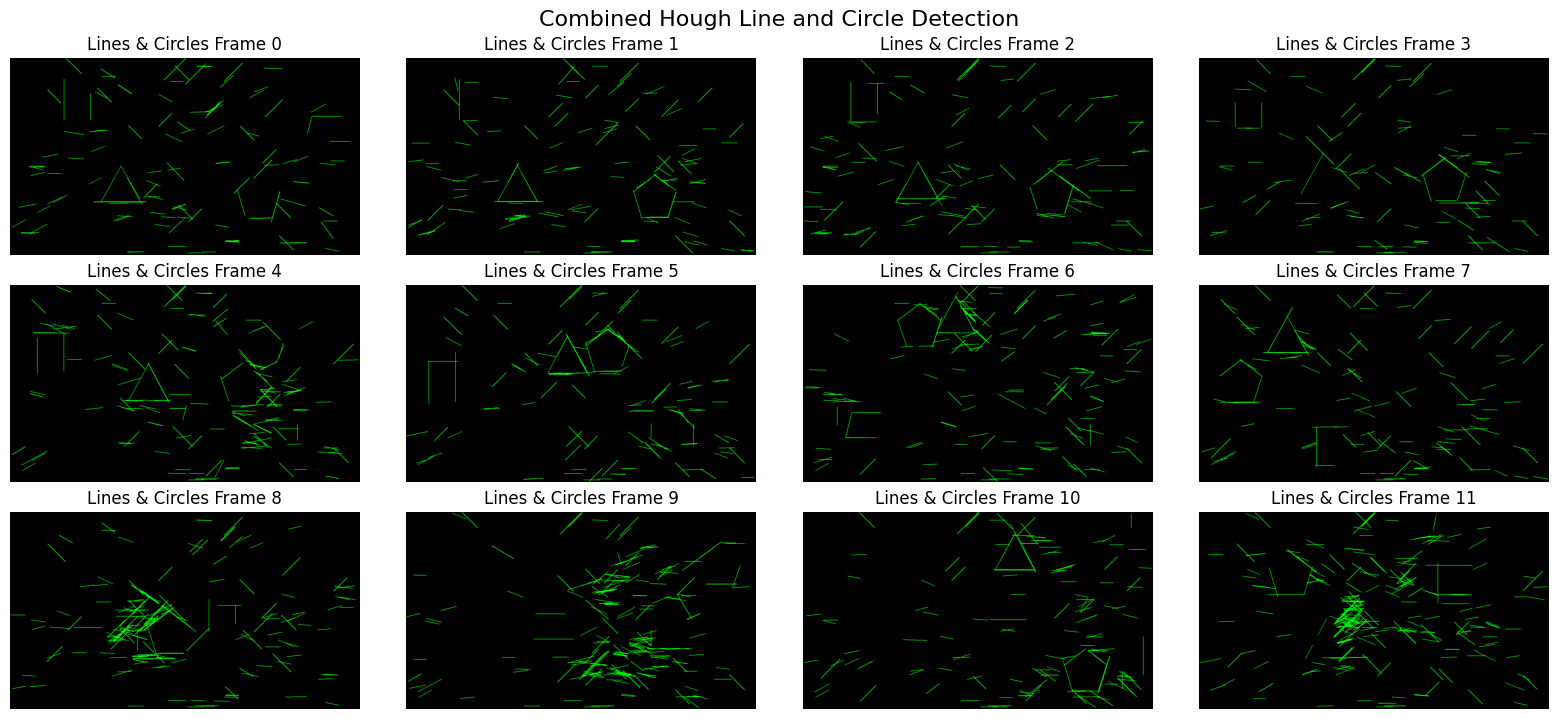

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'extracted_frames' and 'canny_union_results' are already defined
# and populated from your previous Jupyter cell.
# The 'frame_indices' list is also assumed to be available.

hough_detection_results = [] # To store images with lines and circles

# --- Hough Line & Circle Detection Parameters ---
# Hough Line Parameters (tuned as per recommendations)
rho = 1                # Distance resolution in pixels
theta = np.pi / 180    # Angle resolution in radians
threshold_line = 100   # Min number of intersections to detect a line (from 50 -> 100)
min_line_length = 70   # Min length of a line to be accepted (from 30 -> 50)
max_line_gap = 10      # Max allowed gap between points on the same line (from 5 -> 10)

# Hough Circle Parameters
dp = 1.2               # Inverse ratio of the accumulator resolution to the image resolution.
minDist = 20           # Minimum distance between the centers of the detected circles.
param1 = 100           # Canny high threshold (for edge detection in HoughCircles).
param2 = 50            # Accumulator threshold for the circle centers at the detection stage.
minRadius = 60         # Minimum circle radius.
maxRadius = 90        # Maximum circle radius.

# Morphological operation kernel
kernel = np.ones((3, 3), np.uint8)
min_area_for_cleaning = 30 # For removing small connected components

# Iterate through the union Canny edge results and original frames
for i, union_edges_rgb in enumerate(canny_union_results):
    # Ensure we have the corresponding original frame for circle detection
    if i >= len(extracted_frames):
        print(f"Warning: Missing original frame for index {i}. Skipping circle detection.")
        continue
    
    frame_bgr = extracted_frames[i]

    # Convert RGB edge image back to grayscale (white on black)
    # The union_edges_rgb stored previously is already grayscale converted to RGB for display,
    # so we convert it back to single channel for processing.
    gray_edges = cv2.cvtColor(union_edges_rgb, cv2.COLOR_RGB2GRAY)
    
    # --- Stage 1a: Pre-Hough filters ---
    # 1. Morphological Closing
    closed_edges = cv2.morphologyEx(gray_edges, cv2.MORPH_CLOSE, kernel)
    
    # 2. Remove small connected components (noise blobs)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        closed_edges, connectivity=8
    )
    cleaned_edges = np.zeros_like(closed_edges)
    # Iterate through all labels (components) excluding the background (label 0)
    for j in range(1, num_labels):
        if stats[j, cv2.CC_STAT_AREA] >= min_area_for_cleaning:
            cleaned_edges[labels == j] = 255 # Keep components larger than min_area

    # Create a blank RGB image to draw lines and circles on.
    # Its size should match the original frame's size.
    hough_img = np.zeros_like(frame_bgr) 

    # --- Stage 1b: Hough Line Transform (Probabilistic) ---
    lines = cv2.HoughLinesP(cleaned_edges, rho, theta, threshold_line,
                            minLineLength=min_line_length, maxLineGap=max_line_gap)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(hough_img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw green lines

    # --- Stage 2: Hough Circle Transform ---
    # Convert the original frame to grayscale for circle detection
    gray_original_frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2GRAY)
    # Blur the grayscale original frame slightly to help HoughCircles
    blurred_for_circles = cv2.medianBlur(gray_original_frame, 5) 
    
    circles = cv2.HoughCircles(blurred_for_circles, cv2.HOUGH_GRADIENT, dp, minDist,
                               param1=param1, param2=param2,
                               minRadius=minRadius, maxRadius=maxRadius)

    if circles is not None:
        # Convert the (x, y, r) coordinates to integers
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            # Draw the outer circle
            cv2.circle(hough_img, (x, y), r, (0, 255, 0), 3) # Draw green circles
            # Draw a small circle (or point) in the center
            cv2.circle(hough_img, (x, y), 1, (255, 0, 0), 3)

    hough_detection_results.append(hough_img)

# --- Plotting Combined Hough Detection Results ---
fig_hough, axes_hough = plt.subplots(3, 4, figsize=(16, 7)) # Adjusted figsize for better viewing
axes_hough = axes_hough.flatten()

for i, img in enumerate(hough_detection_results):
    if i < len(axes_hough):
        # Matplotlib expects RGB, but OpenCV draws in BGR, so convert if hough_img is BGR
        axes_hough[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes_hough[i].set_title(f"Lines & Circles Frame {frame_indices[i]}")
        axes_hough[i].axis('off')

# Hide unused subplots if fewer results than subplots
for j in range(len(hough_detection_results), len(axes_hough)):
    fig_hough.delaxes(axes_hough[j])

plt.tight_layout()
plt.suptitle("Combined Hough Line and Circle Detection", y=1.02, fontsize=16)
plt.show()

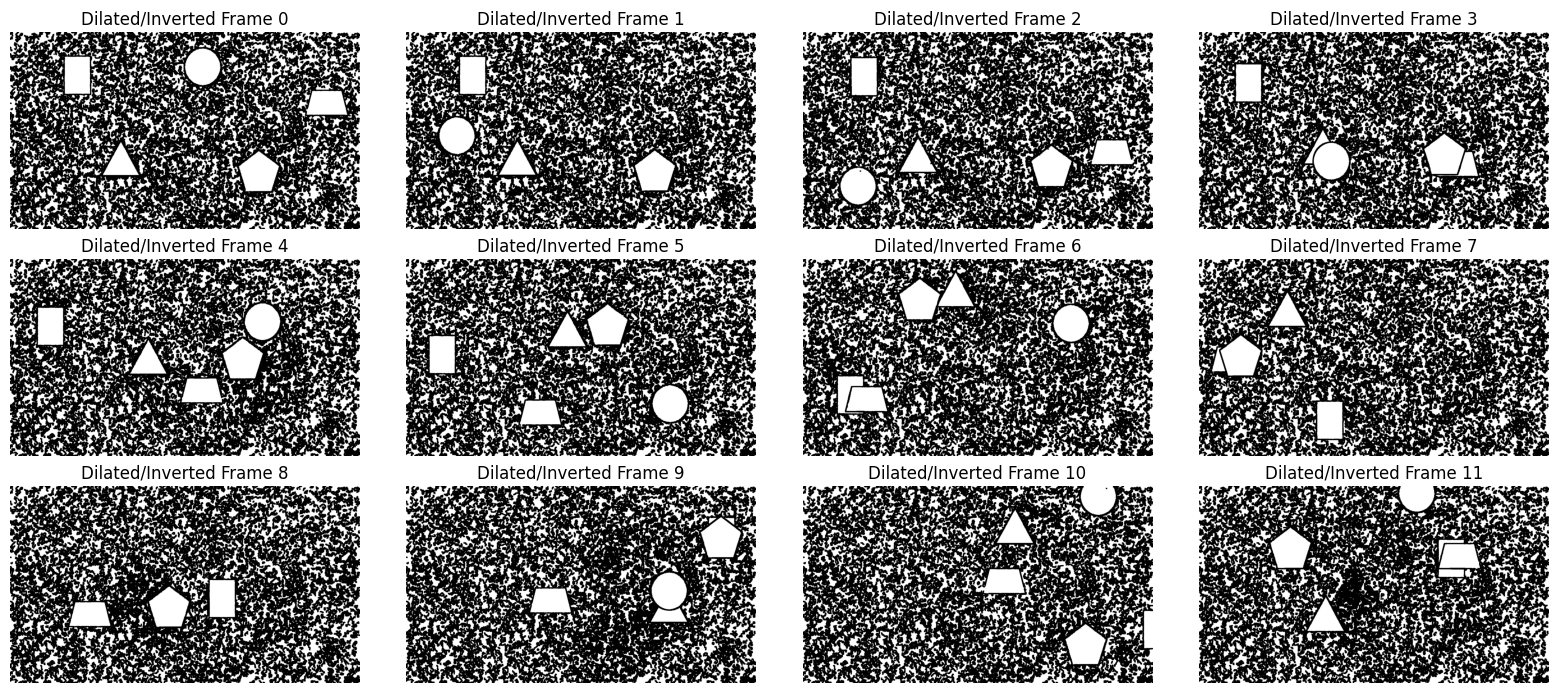

In [7]:
fig, axes = plt.subplots(3, 4, figsize=(16, 7))
axes = axes.flatten()

processed_dilated_inverted = [] # Clear previous, if any

if len(canny_union_results) == 0:
    print("No Canny edge images found to dilate and invert. Run previous cell.")
else:
    kernel = np.ones((3,3), np.uint8)
    for i, edges_bgr in enumerate(canny_union_results):
        if i < len(axes):
            dilated_img = cv2.dilate(edges_bgr, kernel, iterations=3)
            inverted_img_bgr = cv2.bitwise_not(dilated_img)
            processed_dilated_inverted.append(inverted_img_bgr) # Store BGR for next step

            inverted_img_rgb = cv2.cvtColor(inverted_img_bgr, cv2.COLOR_BGR2RGB)
            axes[i].imshow(inverted_img_rgb)
            axes[i].set_title(f"Dilated/Inverted Frame {frame_indices[i]}")
            axes[i].axis('off')

    for j in range(len(canny_union_results), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

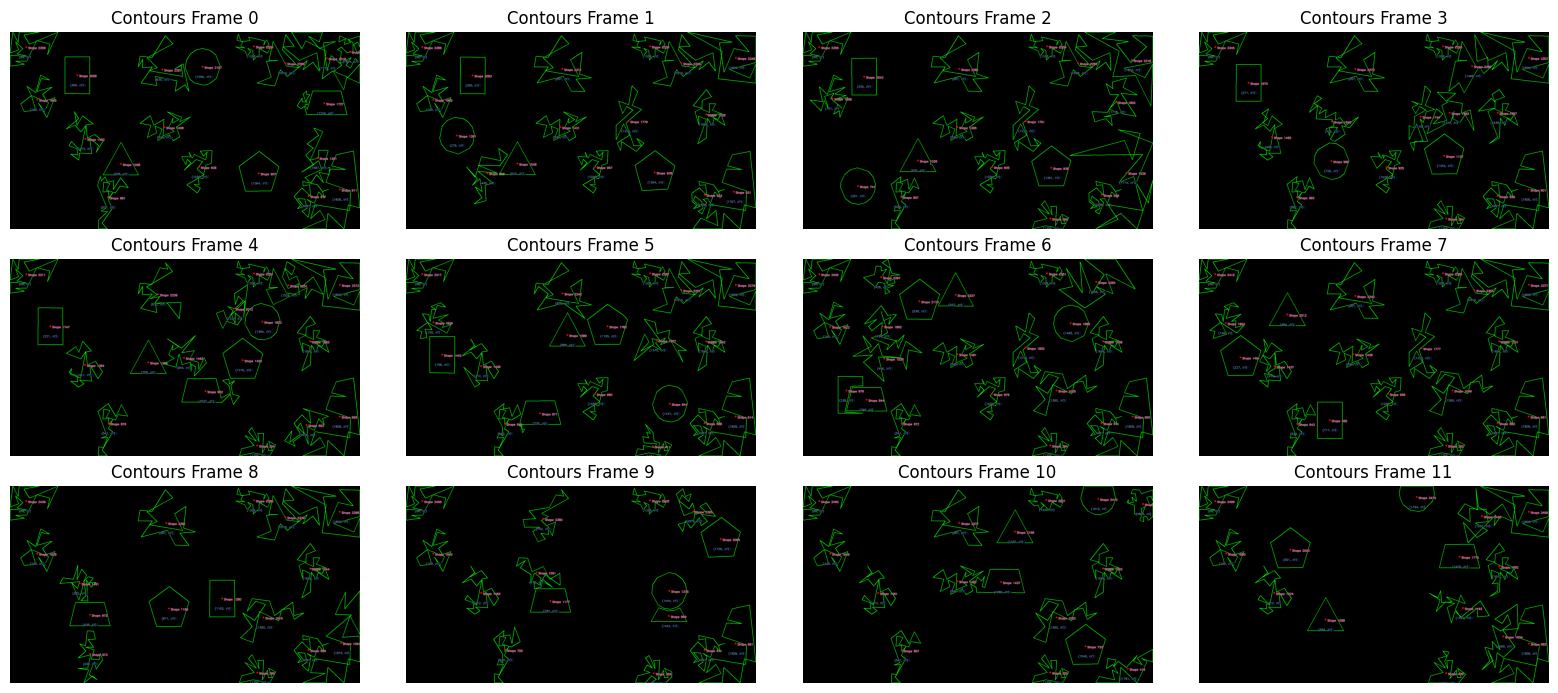

In [8]:
# --- Display Contour Detection Cell ---

fig, axes = plt.subplots(3, 4, figsize=(16, 7))
axes = axes.flatten()

min_contour_area = 10000
processed_contours = [] # Clear previous, if any

outputImgs = [np.zeros_like(processed_dilated_inverted[0]) for img in processed_dilated_inverted]

if len(processed_dilated_inverted) == 0:
    print("No dilated/inverted images found for contour detection. Run previous cells.")
else:
    for i, inverted_img_bgr in enumerate(processed_dilated_inverted):
        if i < len(axes):
            output_img = outputImgs[i]
            gray = cv2.cvtColor(inverted_img_bgr, cv2.COLOR_BGR2GRAY)
            contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            for j, contour in enumerate(contours):
                perimeter = cv2.arcLength(contour, True)
                epsilon = 0.01 * perimeter
                approx = cv2.approxPolyDP(contour, epsilon, True)

                area = cv2.contourArea(approx)
                
                if area > min_contour_area:
                    cv2.drawContours(output_img, [approx], 0, (0, 255, 0), 2) # Green contours

                    M = cv2.moments(approx)
                    cX, cY = 0, 0
                    if M["m00"] != 0:
                        cX = int(M["m10"] / M["m00"])
                        cY = int(M["m01"] / M["m00"])
                        cv2.circle(output_img, (cX, cY), 5, (0, 0, 255), -1) # Red circle
                        cv2.putText(output_img, f"Shape {j+1}", (cX + 10, cY + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red, 3)
                        cv2.putText(output_img, f"Shape {j+1}", (cX + 10, cY + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, white, 1)
                        cv2.putText(output_img, f"({cX}, {cY})", (cX - 40, cY + 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, blue, 3)
                        cv2.putText(output_img, f"({cX}, cY)", (cX - 40, cY + 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, white, 1)

            output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)
            processed_contours.append(output_img_rgb) # Store final RGB image

            axes[i].imshow(output_img_rgb)
            axes[i].set_title(f"Contours Frame {frame_indices[i]}")
            axes[i].axis('off')

    for j in range(len(processed_dilated_inverted), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()